In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime 

import warnings
warnings.filterwarnings('ignore')

## 1. Tiền xử lý dữ liệu

In [39]:
train_df = pd.read_csv('clean_data.csv')
train_df_temp = train_df.copy()
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3,25.0,Quận 7,Hồ Chí Minh,17/10/2018
2,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,Hồ Chí Minh,05/10/2018
3,781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,Hồ Chí Minh,06/10/2018
4,789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7,12.0,Gò Vấp,Hồ Chí Minh,09/10/2018


### Bỏ đi những cột không cần thiết

In [40]:
train_df_temp.drop('City', axis= 1, inplace = True)
train_df_temp.drop('Date', axis= 1, inplace = True)

Ta chỉ xét những giá nhà dưới 10 triệu và diện tích dưới 150 nên sẽ bỏ đi những dòng không đáp ứng điều kiện

In [41]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 10].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 150].index, inplace = True)


### Tạo thêm đặc trưng cho bảng dữ liệu 
> Dựa vào đặc trưng: 'Title' để tạo thêm 6 đặc trưng: isNew(phòng mới hay cũ) , hasFurniture (có nội thất không), liveTogether(ở ghép/ktx), isWholeHouse (có phải nhà nguyên căn không), isApartment (có phải căn hộ không), isNearCenter (có gần trung tâm không)

In [42]:
def isWholeHouse(df):
    df["Title"] = df["Title"].str.lower()
    e = ['nguyên']
    df['isWholeHouse'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [43]:
def isLiveTogether(df):
    df["Title"] = df["Title"].str.lower()
    e = ['ghép','share',"ktx",'túc']
    df['isLiveTogether'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [44]:
def isApartment(df):
    df["Title"] = df["Title"].str.lower()
    e = ['hộ','cư', 'chdv']
    df['isApartment'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [45]:
def isNew(df):
    df["Title"] = df["Title"].str.lower()
    e = ['mới', 'vừa', 'xây']
    df['isNew'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [46]:
def isNearCenter(df):
    df["Title"] = df["Title"].str.lower()
    e = ['tâm', 'tam']
    df['isNearCenter'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [47]:
def hasFurniture(df):
    df["Title"] = df["Title"].str.lower()
    e = ['nội thất', 'noi that', 'tiện nghi','tiện ích']
    df['hasFurniture'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [48]:
train_df_temp = isNew(train_df_temp)
train_df_temp = isNearCenter(train_df_temp)
train_df_temp = hasFurniture(train_df_temp)
train_df_temp = isWholeHouse(train_df_temp)
train_df_temp = isLiveTogether(train_df_temp)
train_df_temp = isApartment(train_df_temp)

In [49]:
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,isNew,isNearCenter,hasFurniture,isWholeHouse,isLiveTogether,isApartment
0,478324,cho thuê phòng để ở tại 108/64a1 trần quang di...,3.5,18.0,Quận 3,no,no,no,no,no,no
1,728993,phòng vừa xây xong thoáng mát gần các trường đ...,3.3,25.0,Quận 7,yes,no,no,no,no,no
2,781296,cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,yes,no,no,no,yes,no
3,781448,chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,no,no,no,no,no,yes
4,789361,"phòng cho thuê giá rẻ, quận gò vấp gần chung c...",1.7,12.0,Gò Vấp,no,no,no,no,no,yes


In [50]:
train_df_temp.shape

(1113, 11)

### Xác định biến Categorical/Numeric

In [51]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 1141
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1113 non-null   int64  
 1   Title               1113 non-null   object 
 2   Price(Triệu/tháng)  1113 non-null   float64
 3   Square(m²)          1113 non-null   float64
 4   District            1113 non-null   object 
 5   isNew               1113 non-null   object 
 6   isNearCenter        1113 non-null   object 
 7   hasFurniture        1113 non-null   object 
 8   isWholeHouse        1113 non-null   object 
 9   isLiveTogether      1113 non-null   object 
 10  isApartment         1113 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 104.3+ KB


In [52]:
# Biến Categorical
cat_vars = ['District', 'isNew', 'hasFurniture', 'isLiveTogether','isNearCenter','isWholeHouse','isApartment']
# Biến numerical
num_vars = ['Price(Triệu/tháng)', 'Square(m²)']

Với biến numerical, nhóm dùng distplot để vẽ biểu đồ phân bố của 2 đặc trưng: Price và Square để quan sát

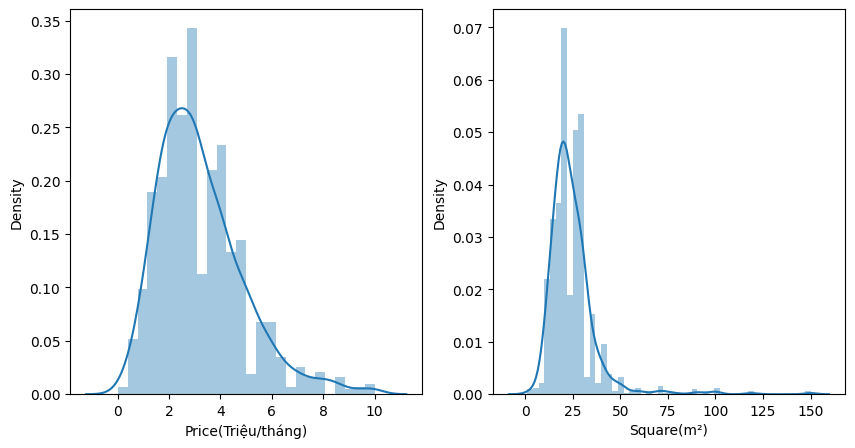

In [53]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
sns.distplot(train_df_temp[num_vars[0]])
plt.subplot(122)
sns.distplot(train_df_temp[num_vars[1]])
plt.show()

Ta thấy ở thuộc tính giá dữ liệu tập trung dưới 10 triệu và ở diện tích dữ liệu tập trung dưới 100 triệu nên ta sẽ loại những dòng trên 10 triệu (giá) và 100 m^2 (Diện tích)

In [54]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 10].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 100].index, inplace = True)


In [55]:
train_df_temp.describe()

,Id,Price(Triệu/tháng),Square(m²)
count,1.109000e+03,1109.000000,1109.000000
mean,1.509160e+06,3.220790,24.238548
std,3.378553e+05,1.673252,11.340440
min,4.783240e+05,0.002000,1.000000
25%,1.443570e+06,2.000000,18.000000
50%,1.561906e+06,3.000000,22.000000
75%,1.740950e+06,4.000000,30.000000
max,2.130491e+06,10.000000,100.000000


### Loại bỏ outliers

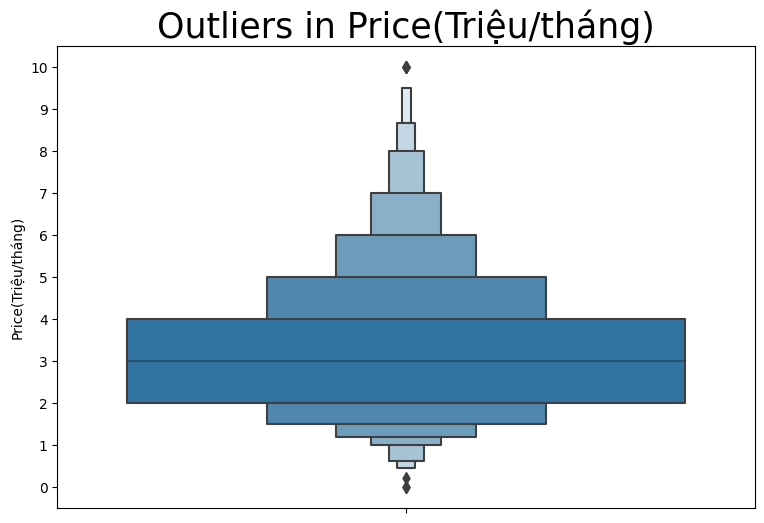

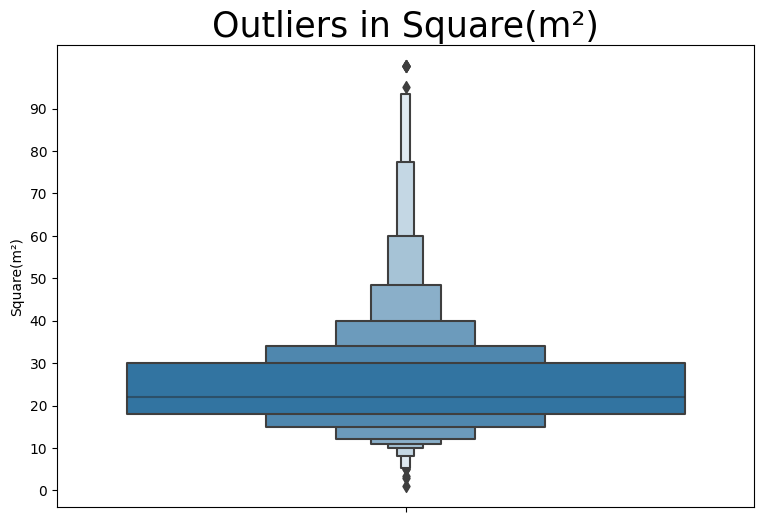

In [56]:
for col in num_vars:
    plt.figure(figsize=(9,6))
    sns.boxenplot(y=col,data=train_df_temp)
    plt.title('Outliers in {}'.format(col),fontsize=25,fontweight=5)
    if col == 'Price(Triệu/tháng)':
        plt.yticks(range(0,11,1))
    if col == 'Square(m²)':
        plt.yticks(range(0,100,10))
    plt.show()

Outliers ở giá nằm ở mức gần 10 triệu, ở diện tích nằm ở mức gần 100 và nằm dưới 5, ta sẽ loại những giá trị này để tránh ảnh hưởng

In [57]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 9.7].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 95].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] < 5].index, inplace = True)

## 2. Chọn các feature để build model

### Ta sẽ Label Encoding các biến category

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,isNew,isNearCenter,hasFurniture,isWholeHouse,isLiveTogether,isApartment
0,478324,cho thuê phòng để ở tại 108/64a1 trần quang di...,3.5,18.0,Quận 3,no,no,no,no,no,no
1,728993,phòng vừa xây xong thoáng mát gần các trường đ...,3.3,25.0,Quận 7,yes,no,no,no,no,no
2,781296,cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,yes,no,no,no,yes,no
3,781448,chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,no,no,no,no,no,yes
4,789361,"phòng cho thuê giá rẻ, quận gò vấp gần chung c...",1.7,12.0,Gò Vấp,no,no,no,no,no,yes


In [60]:
encoder = LabelEncoder()
df_new = train_df_temp.drop(columns=['Id', 'Title', 'Price(Triệu/tháng)', 'Square(m²)'])
for i in cat_vars:
    df_new[i] = encoder.fit_transform(df_new[i])
df_new['Price'] = train_df_temp['Price(Triệu/tháng)']
df_new['Square'] = train_df_temp['Square(m²)']

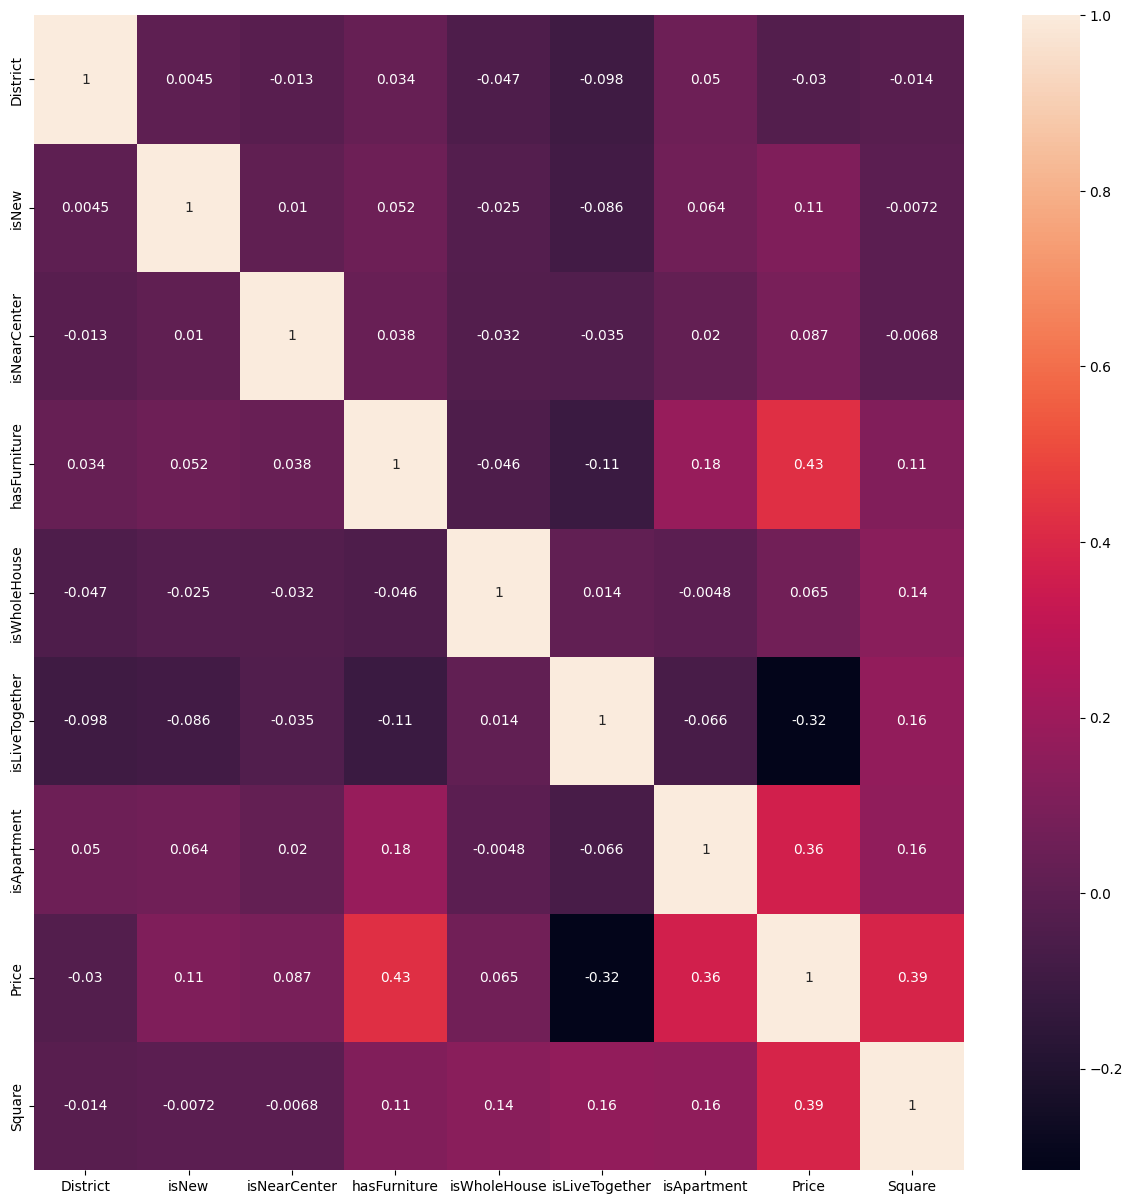

In [61]:
fig= plt.subplots(figsize = (15,15))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

Ta thấy những cột ít có sự ảnh hưởng đến giá nhất là isWholeHouse, isNew, isNearCenter, District, ta sẽ bỏ những thuộc tính này đi

In [62]:
df_new.drop(columns=['isWholeHouse', 'isNew', 'isNearCenter', 'District'],inplace=True)

In [63]:
df_new

,hasFurniture,isLiveTogether,isApartment,Price,Square
0,0,0,0,3.5,18.0
1,0,0,0,3.3,25.0
2,0,1,0,3.0,15.0
3,0,0,1,7.0,27.0
4,0,0,1,1.7,12.0
...,...,...,...,...,...
1137,0,0,0,2.5,20.0
1138,0,0,0,2.0,6.0
1139,1,0,0,2.9,22.0
1140,0,0,0,3.5,52.5


## 3 Xây dựng model

In [64]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import time

Ta sẽ chọn các thuật toán là LinearRegression, Ridge, Lasso, KNeighborsRegressor, RandomForestRegressor

### Chia các tập train, validation, test

In [65]:
X = df_new.drop(columns=['Price'])
y = df_new['Price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

### Ta lần lượt tính độ lỗi (MAE) của các mô hình trên tập train và validation để chọn ra các mô hình tốt nhất

In [67]:
model = LinearRegression()
model.fit(X_train_1,y_train_1)
y_pre_train = model.predict(X_train_1)
y_pre_val = model.predict(X_val_1)
score_train = mean_absolute_error(y_train_1,y_pre_train)
score_val = mean_absolute_error(y_val_1,y_pre_val)
print("Train error (MAE): {}".format(score_train))
print("Val error (MAE): {}".format(score_val))


Train error (MAE): 0.8912796625327452
Val error (MAE): 0.9175076732006372


In [68]:
model = Ridge()
model.fit(X_train,y_train)
model.fit(X_train_1,y_train_1)
y_pre_train = model.predict(X_train_1)
y_pre_val = model.predict(X_val_1)
score_train = mean_absolute_error(y_train_1,y_pre_train)
score_val = mean_absolute_error(y_val_1,y_pre_val)
print("Train error (MAE): {}".format(score_train))
print("Val error (MAE): {}".format(score_val))

Train error (MAE): 0.890914636976035
Val error (MAE): 0.9185421363404099


Linear và Ridge có độ lỗi trên tập train và val khá tương đồng nhau

In [69]:
model = Lasso()
model.fit(X_train_1,y_train_1)
y_pre_train = model.predict(X_train_1)
y_pre_val = model.predict(X_val_1)
score_train = mean_absolute_error(y_train_1,y_pre_train)
score_val = mean_absolute_error(y_val_1,y_pre_val)
print("Train error (MAE): {}".format(score_train))
print("Val error (MAE): {}".format(score_val))

Train error (MAE): 1.0995664919522348
Val error (MAE): 1.1733058322011631


Độ lỗi trên mô hình Lasso là khá lớn nên ta sẽ loại

In [70]:
model = KNeighborsRegressor()
model.fit(X_train_1,y_train_1)
y_pre_train = model.predict(X_train_1)
y_pre_val = model.predict(X_val_1)
score_train = mean_absolute_error(y_train_1,y_pre_train)
score_val = mean_absolute_error(y_val_1,y_pre_val)
print("Train error (MAE): {}".format(score_train))
print("Val error (MAE): {}".format(score_val))

Train error (MAE): 0.8701111111111111
Val error (MAE): 1.0012102272727272


KNeighborsRegressor có độ lỗi trên tập train thấp hơn một chút nhưng độ lỗi trên tập val lại cao hơn hẳn -> loại

In [71]:
model = RandomForestRegressor()
model.fit(X_train_1,y_train_1)
y_pre_train = model.predict(X_train_1)
y_pre_val = model.predict(X_val_1)
score_train = mean_absolute_error(y_train_1,y_pre_train)
score_val = mean_absolute_error(y_val_1,y_pre_val)
print("Train error (MAE): {}".format(score_train))
print("Val error (MAE): {}".format(score_val))

Train error (MAE): 0.7688080402946029
Val error (MAE): 0.8967904832693148


RandomForestRegressor có độ lỗi trên tập train khá thấp, nhưng độ lỗi trên tập val lại khá cao, ta vẫn sử dụng mô hình này để chạy

======TRAIN======
Train error (MAE): 0.8965871598894712
R2 score : 0.4433767970243866
======TEST======
Test error (MAE): 0.896719093191909
R2 score : 0.5136482711159653


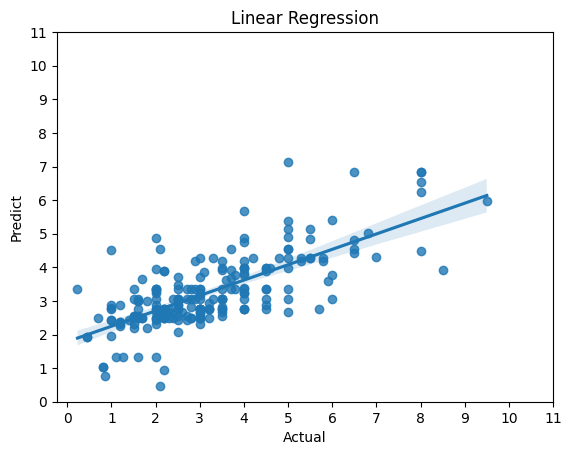

In [72]:
model = LinearRegression()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train)
score_r2 = r2_score(y_train,y_pre_train)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test)
score_r2 = r2_score(y_test,y_pre_test)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

======TRAIN======
Train error (MAE): 0.8962624577276416
R2 score : 0.44334152727274223
======TEST======
Test error (MAE): 0.8975243592387893
R2 score : 0.5129394657434461


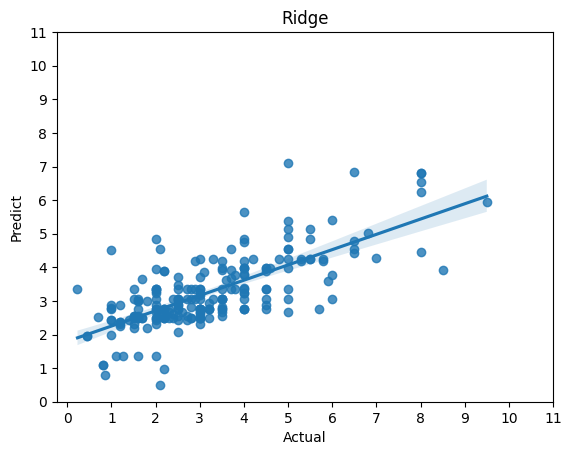

In [73]:
model = Ridge()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train)
score_r2 = r2_score(y_train,y_pre_train)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test)
score_r2 = r2_score(y_test,y_pre_test)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Ridge')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

======TRAIN======
Train error (MAE): 0.780914965312809
R2 score : 0.5688765960963784
======TEST======
Test error (MAE): 0.8763951645726464
R2 score : 0.520130911464898


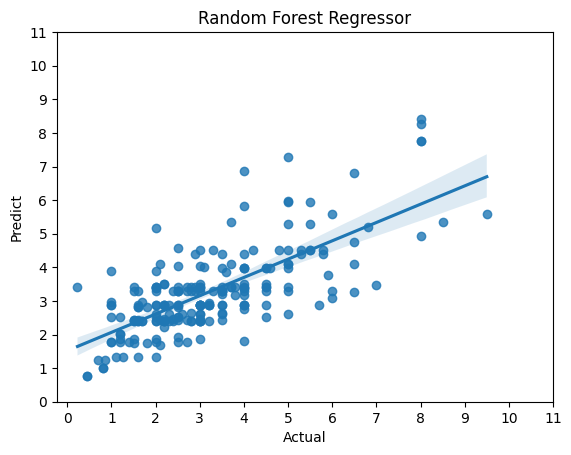

In [74]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train)
score_r2 = r2_score(y_train,y_pre_train)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test)
score_r2 = r2_score(y_test,y_pre_test)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Random Forest Regressor')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

Ta thấy tuy train Linear và Ridge có R2_score thấp cùng độ lỗi cao nhưng khi cho chạy tập test thì lại có kết quả tốt hơn cả train. RandomForestRegressor thì ngược lại, train đưa ra kết quả rất tốt nhưng thực tế lại đưa ra kết quả thấp hơn 2 mô hình kia